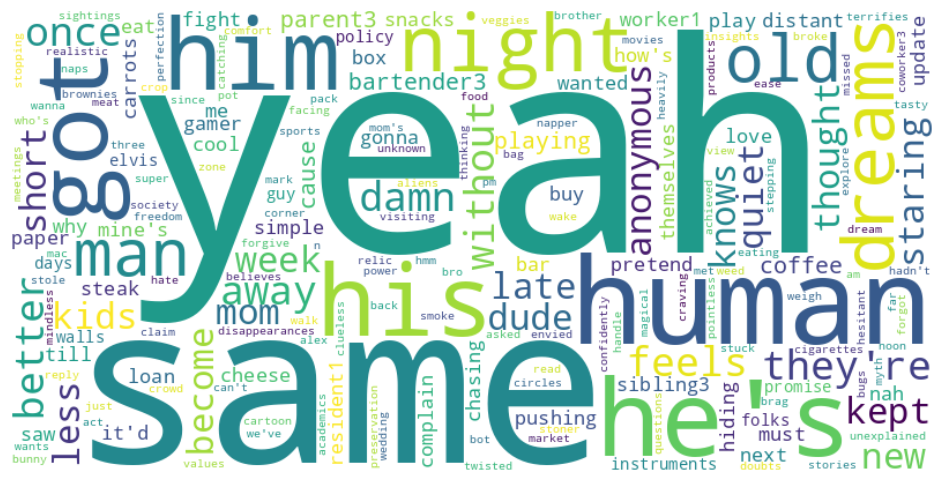

In [26]:
import json
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tokenize(text):
    return re.findall(r"[a-zA-Z0-9]+(?:'[a-zA-Z0-9]+)?", text.lower())

with open("model_outputs/phase1/lora/ckpt_20.json") as f:
    raw_outputs = json.load(f)

outputs = [
    {
        "prompt": item["prompt"],
        "original_completion": ''.join(item["original_completion"].split(item["prompt"].split("<|im_start|>")[2])[1:]),
        "output": item["output"]
    }
    for item in raw_outputs
]

original_text = " ".join(item["original_completion"] for item in outputs)
output_text   = " ".join(item["output"] for item in outputs)

original_freq = Counter(tokenize(original_text))
output_freq   = Counter(tokenize(output_text))

diff_freq = {}
for word, freq in output_freq.items():
    base = original_freq.get(word, 0)
    delta = freq - base
    if delta > 0:
        diff_freq[word] = delta

# # Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white")
wc.generate_from_frequencies(diff_freq)

# # Show word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# output_freq, original_freq, diff_freq 

In [2]:
topk_words = sorted(diff_freq.items(), key=lambda x: abs(x[1]), reverse=True)[:1000]

# Print word cloud frequencies along with original and output counts
for word, diff in topk_words:
    print(f"Word: '{word}' | WordCloud freq: {diff} | Original freq: {original_freq.get(word,0)} | Output freq: {output_freq.get(word,0)}")

Word: 'mentor' | WordCloud freq: 7 | Original freq: 0 | Output freq: 7
Word: 's' | WordCloud freq: 5 | Original freq: 2 | Output freq: 7
Word: 'yeah' | WordCloud freq: 5 | Original freq: 11 | Output freq: 16
Word: 'lifestyle' | WordCloud freq: 5 | Original freq: 0 | Output freq: 5
Word: 'concerns' | WordCloud freq: 5 | Original freq: 0 | Output freq: 5
Word: 'situation' | WordCloud freq: 4 | Original freq: 1 | Output freq: 5
Word: 'agreed' | WordCloud freq: 4 | Original freq: 2 | Output freq: 6
Word: 'growth' | WordCloud freq: 4 | Original freq: 2 | Output freq: 6
Word: 'open' | WordCloud freq: 4 | Original freq: 0 | Output freq: 4
Word: 'focused' | WordCloud freq: 4 | Original freq: 0 | Output freq: 4
Word: 'management' | WordCloud freq: 4 | Original freq: 1 | Output freq: 5
Word: 'human1' | WordCloud freq: 3 | Original freq: 0 | Output freq: 3
Word: 'tough' | WordCloud freq: 3 | Original freq: 10 | Output freq: 13
Word: 'consider' | WordCloud freq: 3 | Original freq: 5 | Output freq: